In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=sns.load_dataset('iris')

In [2]:
df=pd.DataFrame(data)

In [3]:
print(df.shape)

(150, 5)


In [4]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [7]:
#print(df.duplicated())

In [8]:
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [9]:
#Class Distribution
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
corr=df.corr(numeric_only=True)
print(corr)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


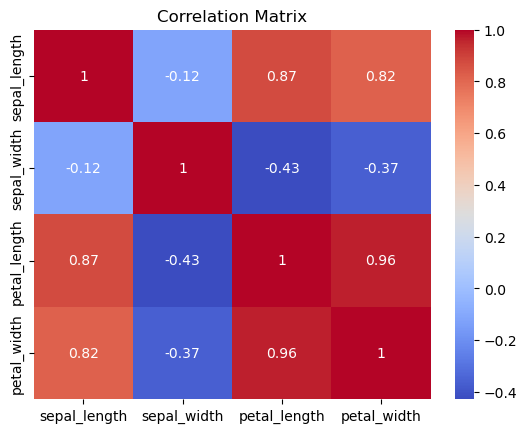

In [11]:
#Correlation Matrix with heatmap
#Only for numerical columns:

sns.heatmap(corr, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

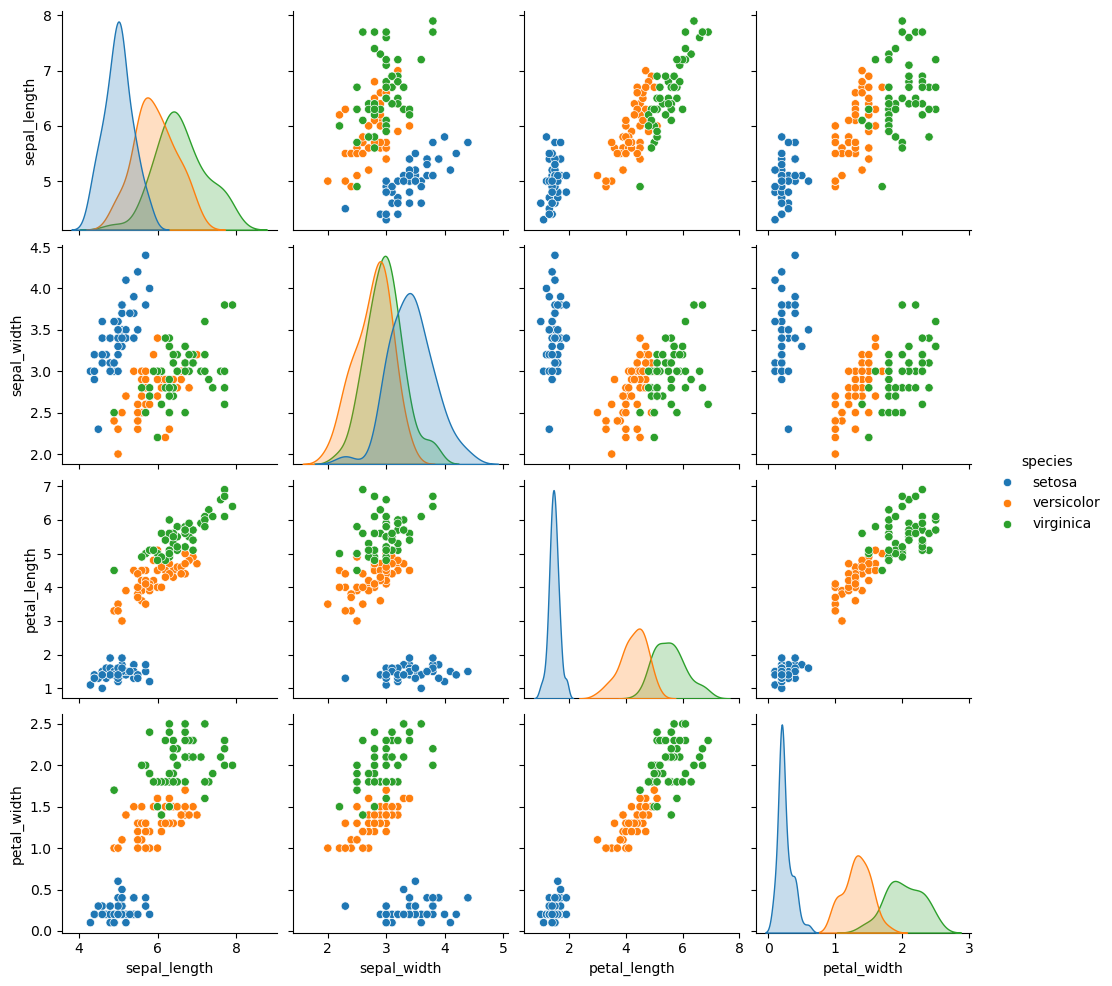

In [12]:
#Pairplot
sns.pairplot(df, hue='species')

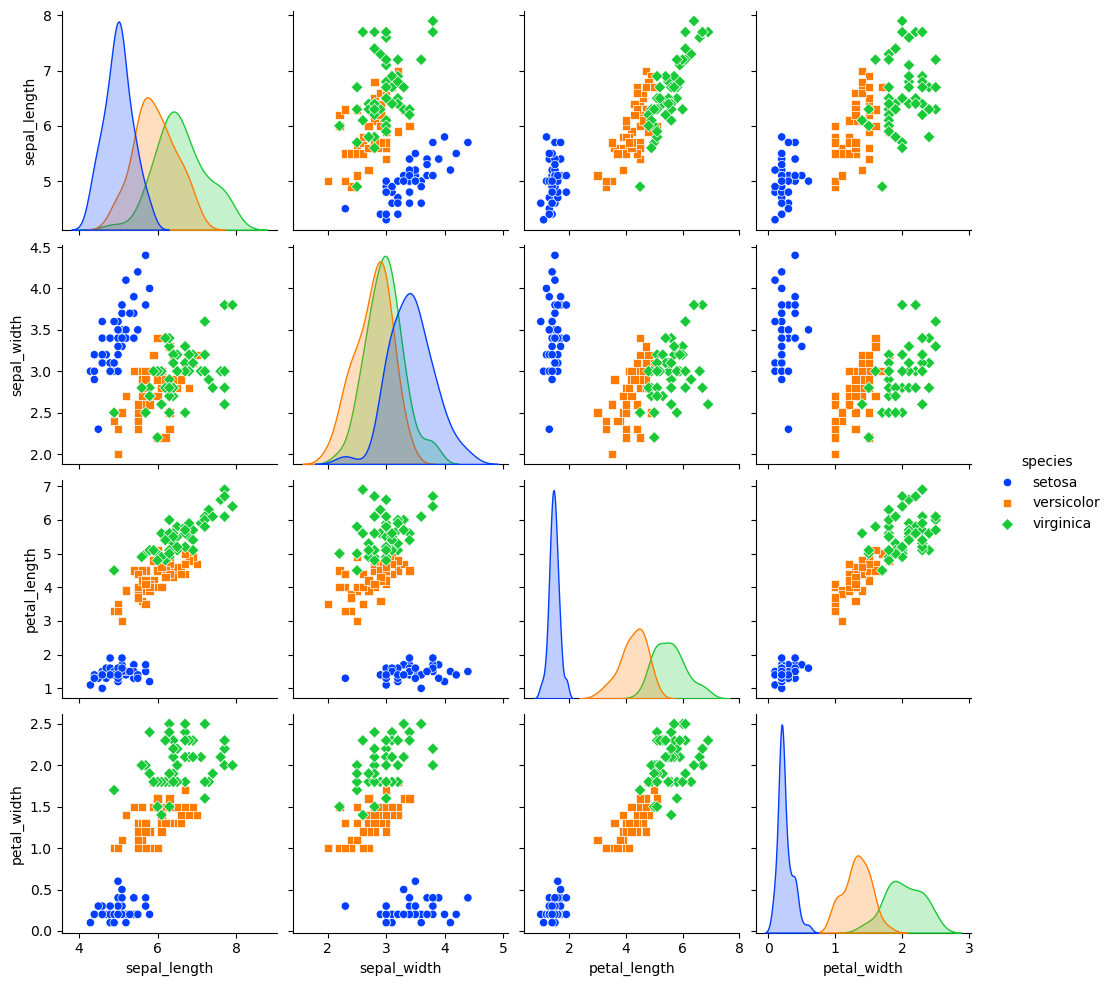

In [13]:
sns.pairplot(df, hue='species', diag_kind='kde', markers=['o', 's', 'D'], palette='bright')

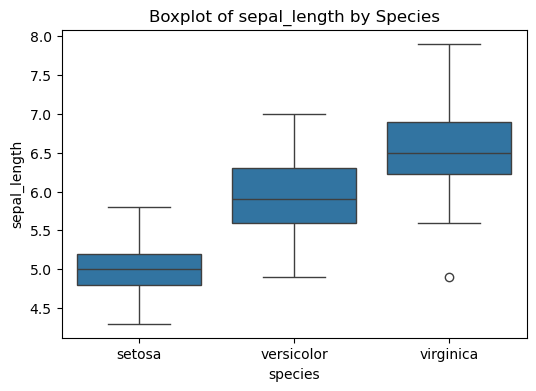

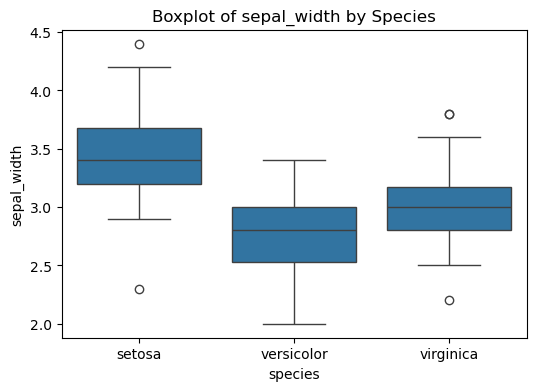

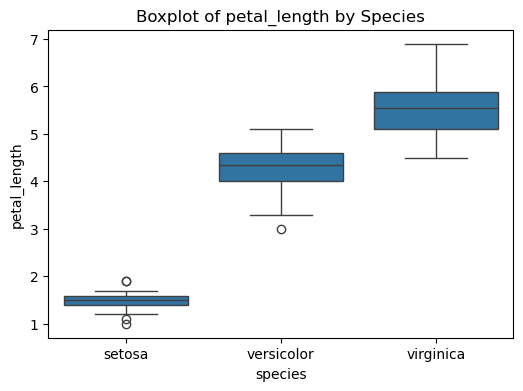

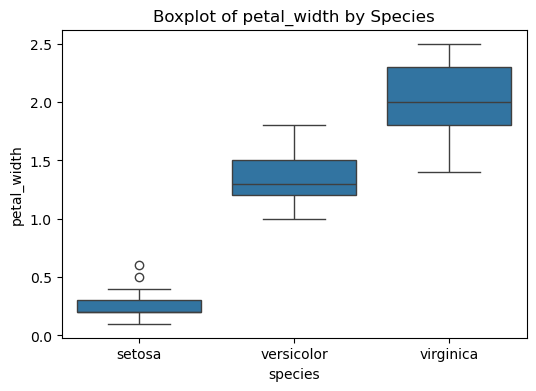

In [14]:
#Box PLot
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='species', y=col, data=df)
    plt.title(f'Boxplot of {col} by Species')
    plt.show()


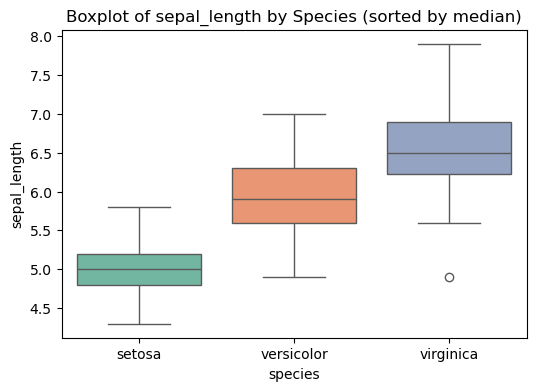

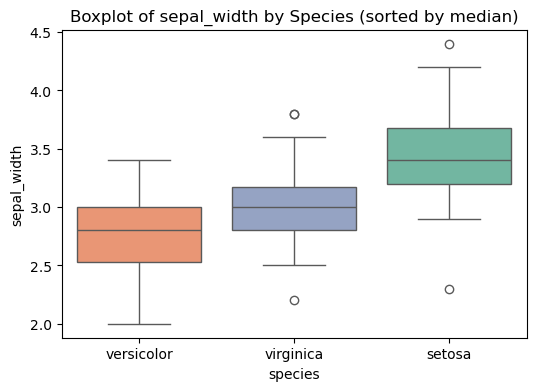

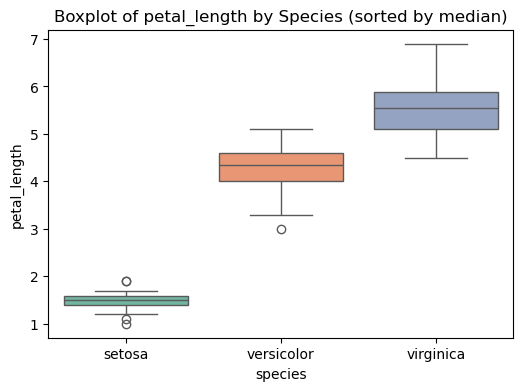

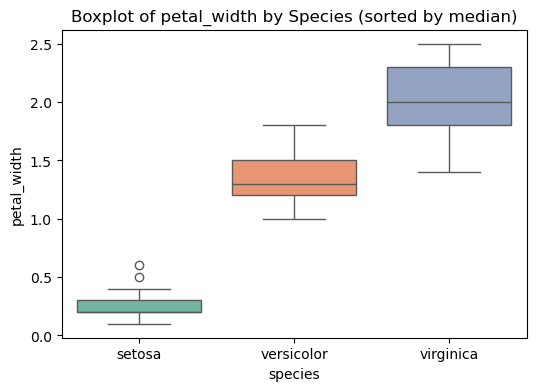

In [15]:

# Custom color palette (Seaborn provides many)
unique_species = data['species'].nunique()
palette = sns.color_palette("Set2",n_colors=unique_species)

# Loop through numeric columns
for col in df.select_dtypes(include=np.number).columns:
    plt.figure(figsize=(6, 4))

    # Compute median per species for sorting
    order = df.groupby('species')[col].median().sort_values().index

    # Plot
    sns.boxplot(x='species', y=col, data=df, order=order, palette=palette, hue='species',legend=False)
    plt.title(f'Boxplot of {col} by Species (sorted by median)')
    plt.show()

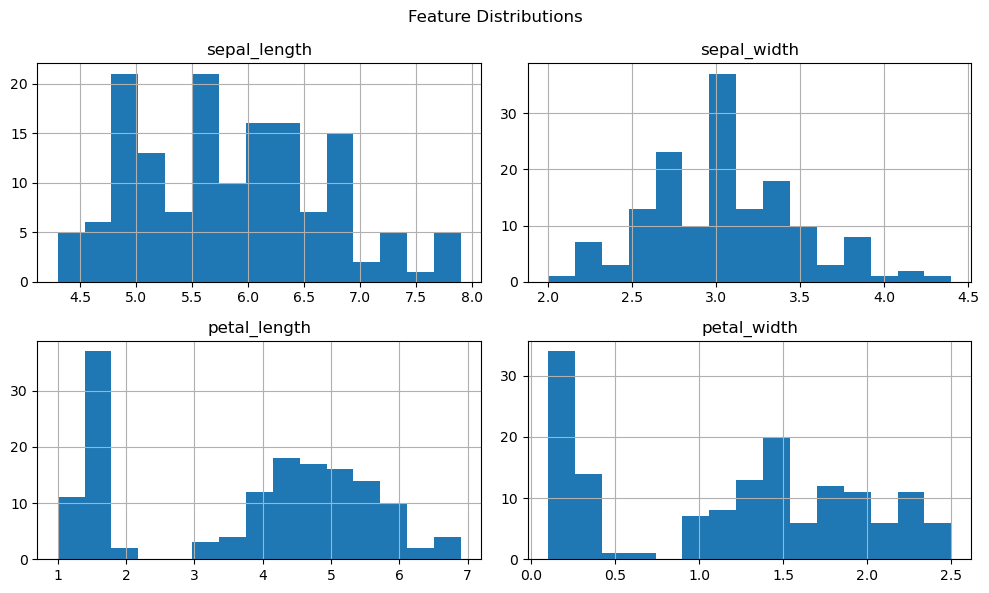

In [16]:
#Histogram/KDE PLots
#Look at the distribution of individual features:


df.hist(figsize=(10, 6), bins=15)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()


"""
What is a KDE Plot?

A KDE plot shows the probability density function of a continuous variable. 
It estimates the distribution by "smoothing" it using kernels (usually Gaussian).

Think of it like a smoothed-out histogram. Very useful for comparing distributions between groups (e.g., different species).
"""

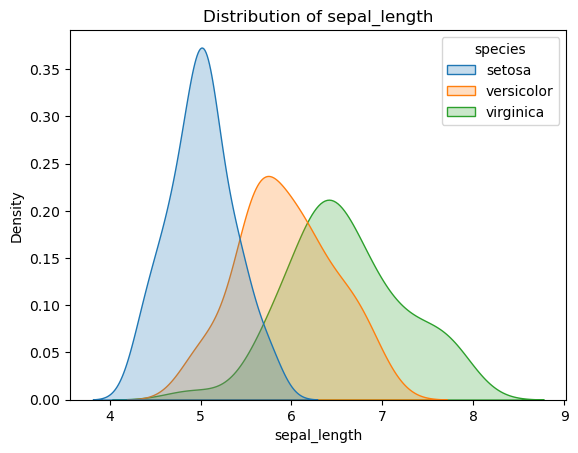

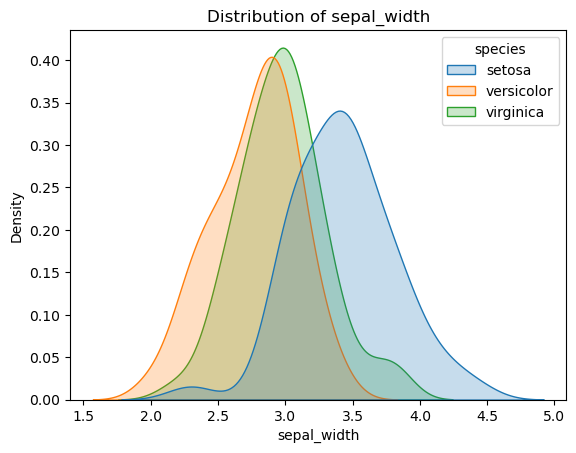

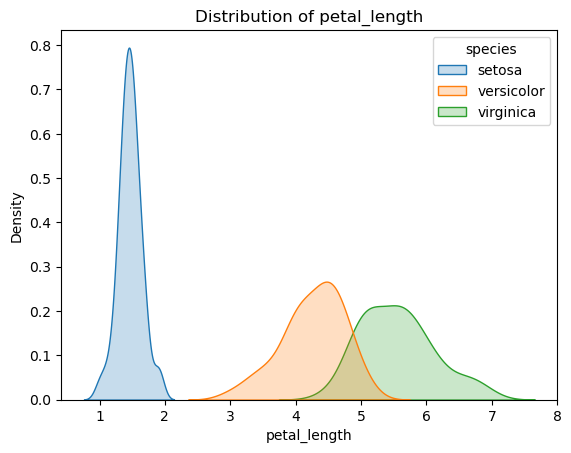

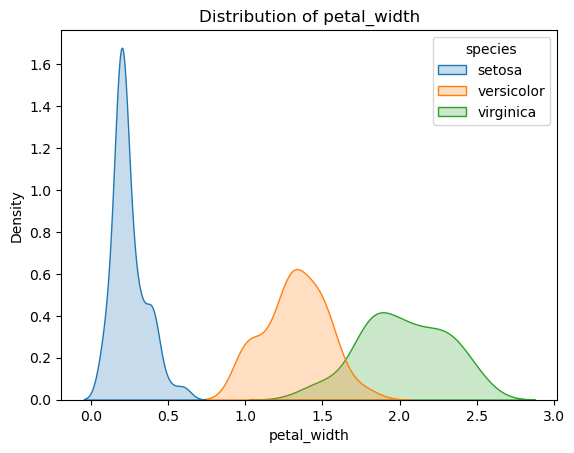

In [17]:
#Or with KDE:
for col in df.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.kdeplot(data=df, x=col, hue='species', fill=True)
    plt.title(f'Distribution of {col}')
    plt.show()


In [18]:
#Outlier Detection (Optional)
#Using z-score or IQR:

from scipy.stats import zscore
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers per column:\n", outliers)


Outliers per column:
 [0 1 0 0]


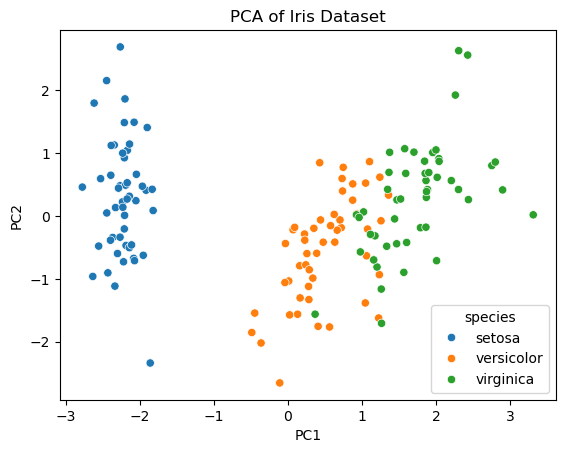

In [19]:
# Step 3: Dimensionality Reduction (PCA)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Features and labels
X = df.drop('species', axis=1)
y = df['species']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA result
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='species')
plt.title("PCA of Iris Dataset")
plt.show()


In [20]:
# Step 4: Model Training & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"🔍 Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)


🔍 Model: Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

--------------------------------------------------
🔍 Model: KNN
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg

In [21]:
# Optional: Step 4b - Hyperparameter Tuning for KNN
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 11)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best K: {'n_neighbors': 3}
Best Score: 0.9583333333333334


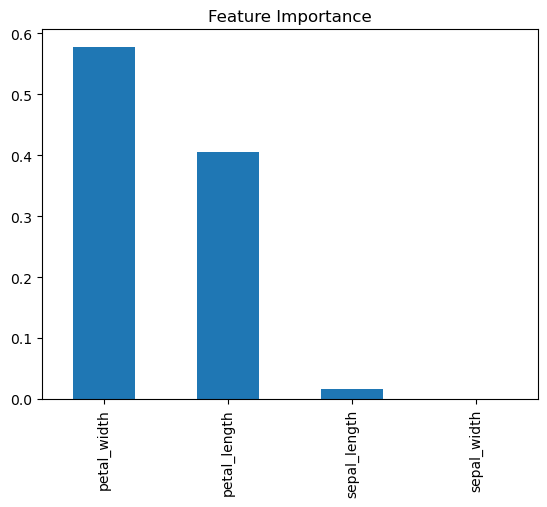

In [22]:
# Step 5: Interpretation of Results

# Feature Importance from Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importance')
plt.show()
